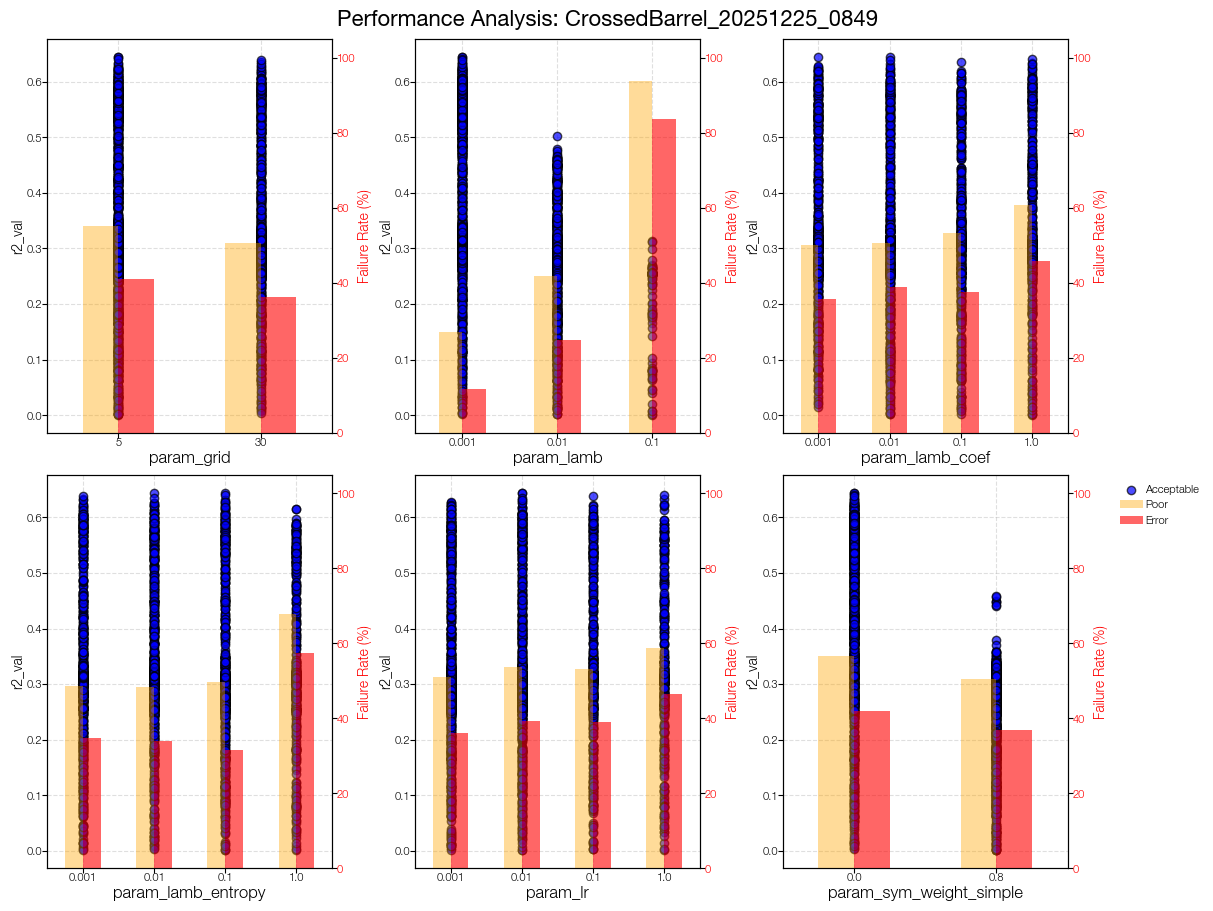

In [1]:
import pandas as pd
import os
from kan.experiments.multkan_hparam_sweep import plot_parameter_performance

root_dir = os.path.join(os.getcwd())
save_dir = os.path.join(root_dir, "custom_figures", "material_05")
os.makedirs(save_dir, exist_ok=True)

f_param = "CrossedBarrel_20251225_0849"
save_heading = os.path.join(save_dir, f_param + "_analysis")
load_heading = os.path.join(root_dir, 'multkan_sweep_autosave', f_param)
plot_parameter_performance([f_param], os.path.join(root_dir, 'multkan_sweep_autosave'), f_param)


In [2]:
import pandas as pd

def load_results_from_excel(excel_path: str) -> pd.DataFrame:
    """Retrieves the 'results' sheet from the saved Excel file."""
    try:
        # We specify sheet_name='results' to match your save function
        df_results = pd.read_excel(excel_path, sheet_name='results')
        return df_results
    except Exception as e:
        print(f"Error loading Excel file: {e}")
        return None

# Usage
df = load_results_from_excel(load_heading + ".xlsx")

In [3]:
from kan.experiments.multkan_hparam_sweep import _aggregate_by_params, _save_excel_params_group

res_retrieved = df.to_dict(orient='records')
print(res_retrieved[0].keys())
agg_rows, best_agg = _aggregate_by_params(res_retrieved)
_save_excel_params_group(load_heading + ".xlsx", agg_rows, best_agg)

dict_keys(['r2_train', 'r2_val', 'r2_test', 'train_loss', 'val_loss', 'test_loss', 'spline_train_loss', 'spline_test_loss', 'seed', 'device', 'error', 'traceback', 'timestamp', 'param_grid', 'param_grid_range', 'param_k', 'param_lamb', 'param_lamb_coef', 'param_lamb_entropy', 'param_lr', 'param_mult_arity', 'param_opt', 'param_prune', 'param_pruning_edge_th', 'param_pruning_node_th', 'param_steps', 'param_sym_weight_simple', 'param_symbolic', 'param_update_grid', 'param_width'])


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from kan.custom_processing import remove_outliers_iqr
import torch
import os

filepath = os.path.join(root_dir, "data", "CrossedBarrel.csv")
filedata = pd.read_csv(filepath)
name_X = filedata.columns[:-1].tolist()
name_y = filedata.columns[-1]
df_in = filedata[name_X]
df_out = filedata[[name_y]]
print(f"TARGET: {name_y}")

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

df_in_final, df_out_final = remove_outliers_iqr(df_in, df_out)

removed_count = len(df_in) - len(df_in_final)
print(f"# of data after removing outliers: {len(df_in_final)} 개 ({removed_count} 개 제거됨)")

X = df_in_final[name_X].values
y = df_out_final[name_y].values.reshape(-1, 1)

X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.2,
                                                  random_state=42)
print(f"Train set: {len(X_train)} ({len(X_train) / len(X) * 100:.1f}%)")
print(f"Validation set: {len(X_val)} ({len(X_val) / len(X) * 100:.1f}%)")
print(f"Test set: {len(X_test)} ({len(X_test) / len(X) * 100:.1f}%)")

feature_range = (0.1, 0.9)
scaler_X = MinMaxScaler(feature_range=feature_range)
scaler_y = MinMaxScaler(feature_range=feature_range)

X_train_norm = scaler_X.fit_transform(X_train)
y_train_norm = scaler_y.fit_transform(y_train)

X_val_norm = scaler_X.transform(X_val)
X_test_norm = scaler_X.transform(X_test)

y_val_norm = scaler_y.transform(y_val)
y_test_norm = scaler_y.transform(y_test)

y = df_out_final[name_y].values.reshape(-1, 1)

TARGET: toughness
# of data after removing outliers: 1800 개 (0 개 제거됨)
Train set: 1152 (64.0%)
Validation set: 288 (16.0%)
Test set: 360 (20.0%)


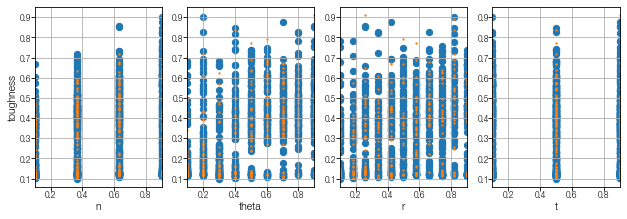

In [5]:
import matplotlib.pyplot as plt

num_input = X.shape[1]
fig, axs = plt.subplots(1, num_input, figsize=(10, 3))
for i in range(num_input):
    ax = axs[i]
    ax.scatter(X_train_norm[:, i], y_train_norm)
    ax.scatter(X_test_norm[:, i], y_test_norm, s=1.5)
    ax.set_xlabel(name_X[i])
    ax.grid()
axs[0].set_ylabel(name_y)
plt.show()

| train_loss: 9.26e-02 | test_loss: 1.03e-01 | reg: 1.58e+01 | : 100%|█| 30/30 [00:09<00:00,  3.27it


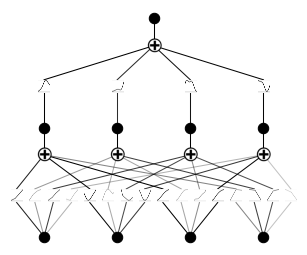

| train_loss: 9.14e-02 | test_loss: 1.03e-01 | reg: 1.25e+01 | : 100%|█| 30/30 [00:08<00:00,  3.35it


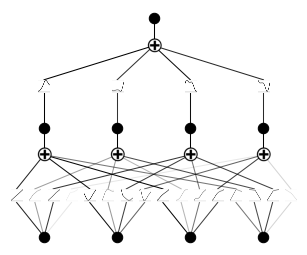

| train_loss: 8.54e-02 | test_loss: 9.93e-02 | reg: 1.30e+01 | : 100%|█| 30/30 [00:10<00:00,  2.77it


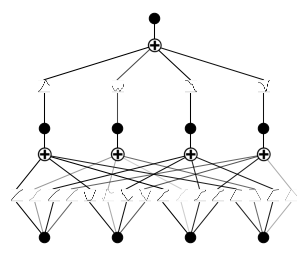

r2 is 0.9999996423721313
fixing (0,0,0) with tanh, r2=1.0, c=3
r2 is 1.000000238418579
fixing (0,0,1) with sin, r2=1.0, c=2
r2 is 0.9999993443489075
fixing (0,0,2) with tanh, r2=1.0, c=3
r2 is 0.9999997615814209
fixing (0,0,3) with sin, r2=1.0, c=2
r2 is 0.9841024279594421
fixing (0,1,0) with sin, r2=0.98, c=2
Best value at boundary.
r2 is 0.7637866139411926
r2 is not very high, please double check if you are choosing the correct symbolic function.
fixing (0,1,1) with tanh, r2=0.76, c=3
r2 is 0.965513288974762
fixing (0,1,2) with sin, r2=0.97, c=2
r2 is 0.9609254002571106
fixing (0,1,3) with sin, r2=0.96, c=2
r2 is 0.9926251769065857
fixing (0,2,0) with tanh, r2=0.99, c=3
r2 is 0.9923415780067444
fixing (0,2,1) with sin, r2=0.99, c=2
r2 is 0.98264080286026
fixing (0,2,2) with tanh, r2=0.98, c=3
r2 is 0.9917464852333069
fixing (0,2,3) with tanh, r2=0.99, c=3
r2 is 1.0000004768371582
fixing (0,3,0) with x^4, r2=1.0, c=3
r2 is 1.0000008344650269
fixing (0,3,1) with x^2, r2=1.0, c=2
r2 is 

| train_loss: 1.10e-01 | test_loss: 1.12e-01 | reg: 8.51e+00 | : 100%|█| 30/30 [00:12<00:00,  2.43it


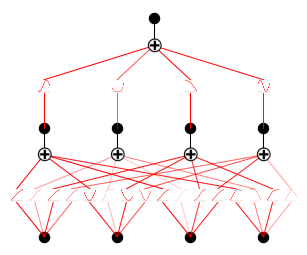

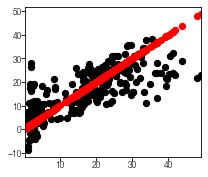

TrialResult(params={'grid': 30, 'grid_range': [0.1, 0.9], 'k': 3, 'lamb': 0.0001, 'lamb_coef': 1, 'lamb_entropy': 0.001, 'lr': 0.01, 'mult_arity': 0, 'opt': 'LBFGS', 'prune': True, 'pruning_edge_th': 0.03, 'pruning_node_th': 0.01, 'steps': 30, 'sym_weight_simple': 0, 'symbolic': True, 'update_grid': True, 'width': [[4, 0], [4, 0], [1, 0]]}, val_loss=5.609099388122559, train_loss=5.231364727020264, test_loss=5.223072528839111, r2_train=0.6426135036925515, r2_val=0.5953632936446525, r2_test=0.6246978573248481, seed=0, device='cpu', spline_train_loss=0.09148826450109482, spline_test_loss=0.10256639122962952)


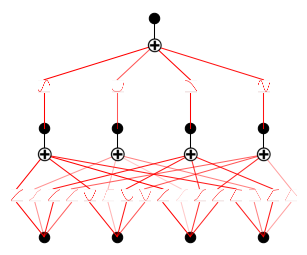

In [6]:
from kan.experiments.multkan_hparam_sweep import evaluate_params

d_opt = pd.read_excel(load_heading + ".xlsx", sheet_name='best_avg_by_params')
d_opt_flat = d_opt.iloc[0]
d_opt_flat = d_opt_flat.to_dict()

params = {k: v for k, v in d_opt_flat.items() if "param_" in k}
params = {key.replace('param_', ''): value for key, value in params.items()}

# params['max_grid'] = 3
params['lamb'] = 1e-4
params['steps'] = 30

res, model, fit_kwargs, dataset = evaluate_params(
    X_train_norm, y_train_norm, X_val_norm, y_val_norm, params, X_test_norm, y_test_norm, 0, scaler_y, device.type,
    save_heading=save_heading
)
print(res)
model.plot()
plt.show()

{'train': 0.6426134991219228, 'test': 0.6246978624352848}


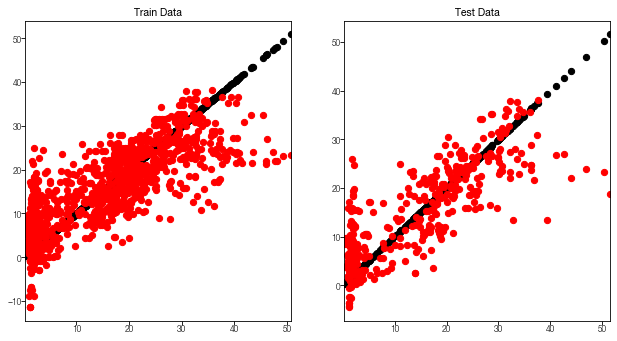

In [7]:
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

y_pred_norm_test = model.forward(x=dataset['test_input']).detach().cpu().numpy()
y_pred_norm_train = model.forward(x=dataset['train_input']).detach().cpu().numpy()

y_pred_test = scaler_y.inverse_transform(y_pred_norm_test)
y_pred_train = scaler_y.inverse_transform(y_pred_norm_train)

r2_score = {
    "train": r2_score(y_train, y_pred_train),
    "test": r2_score(y_test, y_pred_test),
}
print(r2_score)

fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax_train = ax[0]
ax_train.scatter(y_train, y_train, color='k')
ax_train.scatter(y_train, y_pred_train, color='r')
ax_train.set_title("Train Data")

ax_test = ax[1]
ax_test.scatter(y_test, y_test, color='k')
ax_test.scatter(y_test, y_pred_test, color='r')
ax_test.set_title("Test Data")

plt.show()
plt.show()

Text(0, 0.5, 'Attribution score')

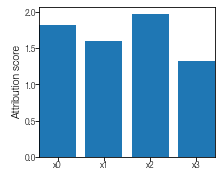

In [8]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
model.forward(dataset['train_input'])
scores_tot = model.feature_score
ax.bar([f"x{i}" for i in range(scores_tot.shape[0])], scores_tot.tolist())
# ax.set_xticks([f"x{i}" for i in range(score_L0.shape[0])])
ax.set_ylabel("Attribution score")

Layer 0 : in 0 -- out 0
Slope: [-0.16180284120855504, 0.06562304496765137, 0.10481816064566374, 0.04058465827256441, -0.027285635471343994, -0.02187595795294328, -1.1801675597666872e-05]
[-1.0, 1.0, 1.0, 1.0, -1.0, -1.0, -1.0]
Inflection point: 0.10000000149011612
Layer 0 : in 0 -- out 1
Slope: [-0.005305147928879705, 0.0022326642647385597, 0.003074046690016985, 0.0, 0.0, 0.0, 0.0]
[-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0]
Inflection point: None
Layer 0 : in 0 -- out 2
Slope: [-0.07022896307898918, 0.029555559158325195, 0.04069484770298004, 0.0, 0.0, 0.0, 0.0]
[-1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
Inflection point: 0.10000000149011612
Layer 0 : in 0 -- out 3
Slope: [-0.09415846777665138, 0.039626192301511765, 0.054561059921979904, 0.0, 0.0, 0.0, 0.0]
[-1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
Inflection point: 0.10000000149011612
Layer 0 : in 1 -- out 0
Slope: [0.524488128721714, -0.2074062004685402, 0.04172377288341522, -0.002754881978034973, 0.12544985115528107, 0.09188733249902725, -0.021

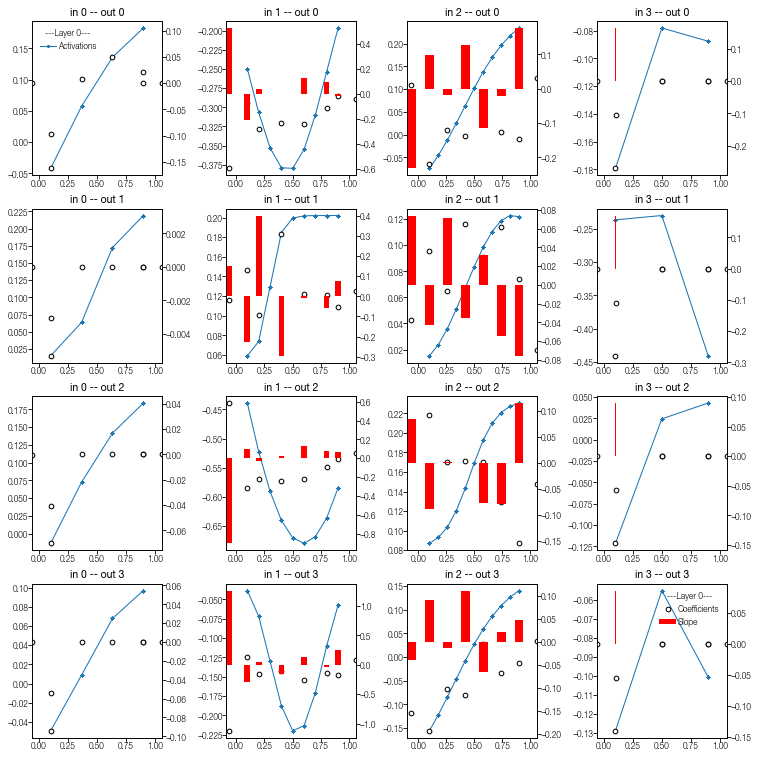

[[[tensor(0.1000), None, tensor(0.1000), tensor(0.1000)], [tensor(0.2012), tensor(0.4004), tensor(0.4004), None], [tensor(0.5800), tensor(0.7400), tensor(0.1000), tensor(0.7400)], [tensor(0.1000), tensor(0.1000), tensor(0.1000), tensor(0.1000)]]]


In [9]:
import numpy as np
from kan.experiments.analysis import find_index_sign_revert

depth = len(model.act_fun)
layers_to_plot = [0]
inflection_points = []

for l in layers_to_plot:
    act = model.act_fun[l]
    ni, no = act.coef.shape[:2]
    coef = act.coef.tolist()
    inflection_points_per_layer = []

    fig, axs = plt.subplots(nrows=no, ncols=ni, squeeze=False,
                            figsize=(max(2.5*ni, 6), max(2.5*no, 3.5)),
                            constrained_layout=True)
    second_axs = np.zeros_like(axs)
    for i in range(ni):
        inflection_points_per_input = []
        for j in range(no):
            ax = axs[j, i]
            # Gather pre- and post-activations and sort by input
            inputs = model.spline_preacts[l][:, j, i].cpu().detach().numpy()
            outputs = model.spline_postacts[l][:, j, i].cpu().detach().numpy()
            output_spline = model.spline_postsplines[l][:, j, i].cpu().detach().numpy() # without base function values
            coef_node = coef[i][j]
            num_knot = act.grid.shape[1]
            spline_radius = int((num_knot - len(coef_node)) / 2)
            bar_width = min(act.grid[i, 1:] - act.grid[i, :-1]) / 2

            rank = np.argsort(inputs)
            ax.plot(inputs[rank], outputs[rank], marker='o', ms=2, lw=1, label='Activations')
            # ax.plot(inputs[rank], output_spline[rank], marker='^', ms=1, lw=1, label='Splines Only')

            ax2 = ax.twinx()
            second_axs[j, i] = ax2
            ax2.scatter(act.grid[i, spline_radius:-spline_radius], coef_node,
                       s=20, color='white', edgecolor='k', label='Coefficients')
            slope = [x - y for x, y in zip(coef_node[1:], coef_node[:-1])]
            slope_2nd = [(x - y)*10 for x, y in zip(slope[1:], slope[:-1])]
            bars = ax2.bar(act.grid[i, spline_radius:-(spline_radius + 1)], slope,
                    width=bar_width, align='center', color='r', label='Slope')
            ax.set_title(f'in {i} -- out {j}', fontsize=10)

            print(f'Layer {l} : in {i} -- out {j}')
            print(f'Slope: {slope}')

            idx_revert = find_index_sign_revert(slope)
            if idx_revert is None:
                inflection_val = None
            else:
                inflection_val = act.grid[i, spline_radius + idx_revert]
            inflection_points_per_input.append(inflection_val)

            print(f'Inflection point: {inflection_val}')
        inflection_points_per_layer.append(inflection_points_per_input)
    axs[0, 0].legend(loc='best', fontsize=8, title=f'---Layer {l}---', title_fontsize=8)
    second_axs[-1, -1].legend(loc='best', fontsize=8, title=f'---Layer {l}---', title_fontsize=8)
    inflection_points.append(inflection_points_per_layer)

    plt.savefig(f'{save_heading}_act_coef_L{l}.png')
    plt.show()
print(inflection_points)

In [10]:
print(inflection_points)

[[[tensor(0.1000), None, tensor(0.1000), tensor(0.1000)], [tensor(0.2012), tensor(0.4004), tensor(0.4004), None], [tensor(0.5800), tensor(0.7400), tensor(0.1000), tensor(0.7400)], [tensor(0.1000), tensor(0.1000), tensor(0.1000), tensor(0.1000)]]]


[0.1, 0.20120000839233398, 0.4004000127315521, 0.9]
[tensor(116), tensor(264), tensor(630)]


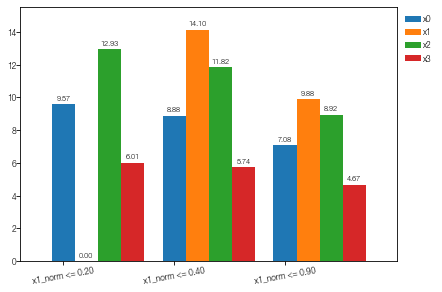

In [11]:
mask_idx = 1
mask_ip_in_range = [ip for ip in inflection_points[0][mask_idx] if ip is not None if ip > 0.1 if ip < 0.9]
mask_ip_unique = torch.unique(torch.tensor(mask_ip_in_range)).tolist()
mask_interval = [0.1] + mask_ip_unique + [0.9]
print(mask_interval)

x_mask = dataset['train_input'][:, mask_idx]
y_vals = dataset['train_label'].ravel()

masks = [ ((x_mask > lb) & (x_mask <= ub)) for lb, ub in zip(mask_interval[:-1], mask_interval[1:])]
labels = [f'x{mask_idx}_norm <= {ub:.2f}' for lb, ub in zip(mask_interval[:-1], mask_interval[1:])]
print([sum(x) for x in masks])

scores_interval = []
scores_interval_norm = []
for mask in masks:
    if np.any(mask.numpy()):
        x_tensor_masked = dataset['train_input'][mask, :]
        x_std = torch.std(x_tensor_masked, dim=0).detach().cpu().numpy()
        model.forward(x_tensor_masked)

        score_masked = model.feature_score.detach().cpu().numpy()
        score_norm = score_masked / (x_std + 1e-6)
        scores_interval.append(score_masked)
        scores_interval_norm.append(score_norm)
    else:
        scores_interval.append(np.zeros(scores_tot.shape))
        scores_interval_norm.append(np.zeros(scores_tot.shape))

width = 0.25
fig, ax = plt.subplots(figsize=(6,4))
xticks = np.arange(len(masks)) * (width * scores_tot.shape[0] * 1.2)
xticklabels = labels
max_score = max([max(s) for s in scores_interval_norm])
for idx in range(scores_tot.shape[0]):
    bars = ax.bar(xticks + idx * width, [s[idx] for s in scores_interval_norm], width, label=f"x{idx}")
    ax.bar_label(bars, fmt='%.2f', fontsize=7, padding=3)
ax.margins(x=0.1)
ax.set_ylim(0, max_score * 1.1)

ax.set_xticks(xticks)
ax.set_xticklabels(xticklabels, rotation=10, ha='center', fontsize=8)
ax.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=8)

plt.tight_layout()
plt.savefig(os.path.join(save_dir, f"{save_heading}_scores_L0_interval_input{mask_idx}.png"))
plt.show()